In [1]:
from DataManipulation.DataHandler import getOHLC_pickle
data = getOHLC_pickle("EURUSD_M_2010_2021.pkl")
data = data.resample('1H').agg({'Open': 'first', 
                        'High': 'max', 
                        'Low': 'min', 
                        'Close': 'last'}).dropna()

In [2]:
#generates the indicators
from DataManipulation.indicators import DEMA, D1, MaxMinRollNorm
demaperiod = [9]
for p in demaperiod:
    data['dema'+str(p)] = DEMA(data['Close'],p)
    data['D1dema'+str(p)] = D1(data['dema'+str(p)])
#    data['normD1dema'+str(p)] = MaxMinRollNorm(data['D1dema'+str(p)], 24*250) # 250 approximated larger than all trading days in a year

stdperiod = [9,100,300]
for p in stdperiod:
    data['std'+str(p)+"_dema9"]  = data['dema9'].rolling(p).std()
    data['std'+str(p)+"_D1dema9"]= data['D1dema9'].rolling(p).std()
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'dema9', 'D1dema9', 'std9_dema9',
       'std9_D1dema9', 'std100_dema9', 'std100_D1dema9', 'std300_dema9',
       'std300_D1dema9'],
      dtype='object')


In [3]:
import numpy as np
x = pd.Series([np.nan,1,2,3,4,5,6,7,8,9])
y = pd.Series([np.nan,2,3,4,5,6,7,8,9,10])
print((x[1:]-y[:-1]).shape)
print((x[1:]-y[:-1]))
print((x[1:].to_numpy()-y[:-1].to_numpy()))

NameError: name 'pd' is not defined

In [6]:
import pandas as pd
prediction_ind = ['D1dema9','std9_dema9','std9_D1dema9', 'std100_dema9', 'std100_D1dema9', 'std300_dema9','std300_D1dema9']
preds = pd.DataFrame()
for n in prediction_ind:
    preds[n+"_norm"] = MaxMinRollNorm(data[n], 24*250)
preds.tail()

,D1dema9_norm,std9_dema9_norm,std9_D1dema9_norm,std100_dema9_norm,std100_D1dema9_norm,std300_dema9_norm,std300_D1dema9_norm
Date,,,,,,,
2021-09-30 19:00:00,0.549541,0.035342,0.157625,0.417056,0.216130,0.387081,0.228713
2021-09-30 20:00:00,0.509068,0.031738,0.166833,0.421059,0.216888,0.390208,0.211806
2021-09-30 21:00:00,0.593398,0.035424,0.145746,0.424265,0.215617,0.392990,0.210738
2021-09-30 22:00:00,0.599056,0.033126,0.123020,0.426708,0.215817,0.395560,0.211329
2021-09-30 23:00:00,0.585908,0.033670,0.104754,0.428453,0.214252,0.397978,0.211484


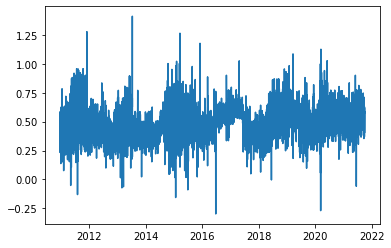

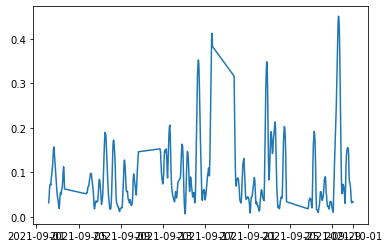

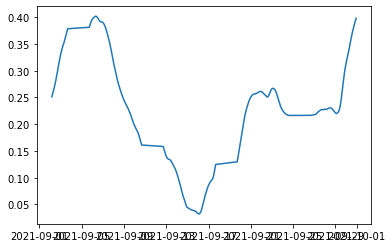

In [19]:
import matplotlib.pyplot as plt
plt.plot(preds['D1dema9_norm'].iloc[:]) # might consider to only divide, not subtract minimum as direction might be useful?
plt.show()
plt.plot(preds['std9_dema9_norm'].iloc[-500:])
plt.show()
plt.plot(preds['std300_dema9_norm'].iloc[-500:])
plt.show()

In [ ]:
import torch
from Models.neural import STDConvModel
m1 = STDConvModel(3*5*24, 2, 12,stride1=2,stride2=2)


In [3]:
import torch
from Models.neural import STDConvModel
m1 = STDConvModel(3*5*24, 2, 12,stride1=2,stride2=2)
m2 = STDConvModel(3*5*24, 2, 12,stride1=1,stride2=1)
from torchinfo import summary
print(m1(torch.zeros((20,2,5*24))).shape)
#print(summary(m1,(20,2,5*24)))
#print(summary(m2,(20,2,5*24)))

torch.Size([20, 1])
